
# Muhammad Bakhtiar Salik
**Data Analysis**
**Predicting House Prices**


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Loading the Boston Housing dataset
boston = load_boston()

# Converting to a Pandas DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Adding target variable (house prices)
df["MEDV"] = boston.target  

# Display first few rows
print(df.head())

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Getting summary statistics
print("\nDataset Summary:\n", df.describe())

# Checking column data types
print("\nColumn Data Types:\n", df.dtypes)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Missing Values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Dataset Summary:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  5

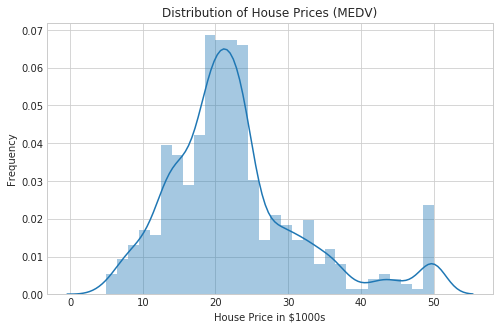

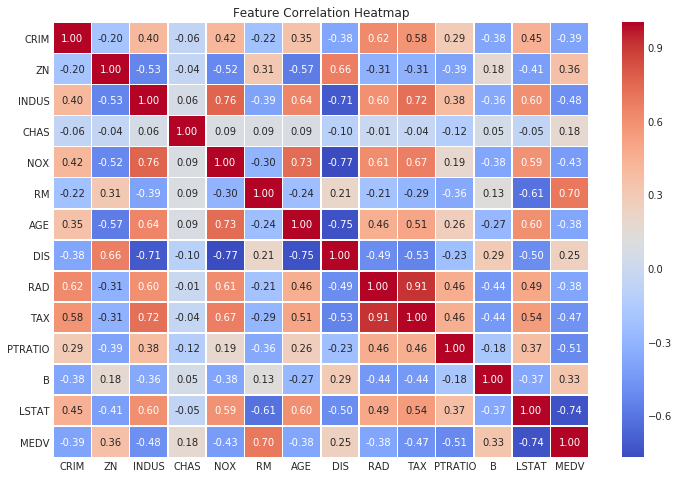

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# 🔹 1. Plot the distribution of target variable (MEDV - House Prices)
plt.figure(figsize=(8, 5))
sns.distplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("House Price in $1000s")
plt.ylabel("Frequency")
plt.show()
plt.show
# 🔹 2. Heatmap of feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converting CHAS to categorical (since it's a binary variable)
df["CHAS"] = df["CHAS"].astype("category")

# Defining Features & Target
X = df.drop(columns=["MEDV"])  # Features (excluding price)
y = df["MEDV"]                 # Target variable (price)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling Numeric Features (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


We can now test data by displaying it! making sure everything is working properly.

In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print first 5 rows of scaled data
print("\nFirst 5 rows of X_train_scaled:\n", X_train_scaled[:5])

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)

First 5 rows of X_train_scaled:
 [[ 1.29133866 -0.50032012  1.03323679 -0.27808871  0.48925206 -1.42806858
   1.02801516 -0.80217296  1.70689143  1.57843444  0.84534281 -0.07433689
   1.75350503]
 [-0.3338103  -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.68008655
  -0.43119908  0.32434893 -0.62435988 -0.58464788  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40072291  1.01327135 -0.71521823 -0.27808871 -1.00872286 -0.40206304
  -1.6185989   1.3306972  -0.97404758 -0.60272378 -0.63717631  0.06529747
  -0.65159505]
 [ 0.39127814 -0.50032012  1.03323679 -0.27808871  0.48925206 -0.30045039
   0.59168149 -0.8392398   1.70689143  1.57843444  0.84534281 -3.86819251
   1.52538664]
 [-0.32270091 -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.83109424
   0.03374663 -0.00549428 -0.62435988 -0.58464788  1.20474139  0.3791194
  -0.16578736]]


Training a Linear Regression Model

It does:

Fits a Linear Regression model on the training data.

Predicts house prices on the test set.

Evaluates performance using MAE, MSE, RMSE, and R² score.


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train_scaled, y_train)

# Making Predictions
y_pred = model.predict(X_test_scaled)

# Evaluating Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"MSE  (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f} (Higher is better)")



📊 Model Performance:
MAE  (Mean Absolute Error): 3.19
MSE  (Mean Squared Error): 24.31
RMSE (Root Mean Squared Error): 4.93
R² Score: 0.6685 (Higher is better)


**Model's Performance:**

**MAE (3.19)** → On average, predictions are $3,190 off.

**RMSE (4.93)** → Errors have a standard deviation of $4,930.

**R² Score** (0.6685) → The model explains ~67% of price variations (not bad but can improve!).

**What Does the Model Predict?**

The model predicts house prices (MEDV) based on various factors like the number of rooms (RM), crime rate (CRIM), accessibility (RAD), etc.

If a house has more rooms (RM), lower crime (CRIM), and good accessibility (RAD), the model predicts a higher price.

If a house has fewer rooms, high crime, and poor accessibility, it predicts a lower price.

It doesn't just take an average—it finds patterns in the data and makes the best guess for each house.

**Actual vs. Predicted Prices**

**Plot Predictions vs. Actual Prices**

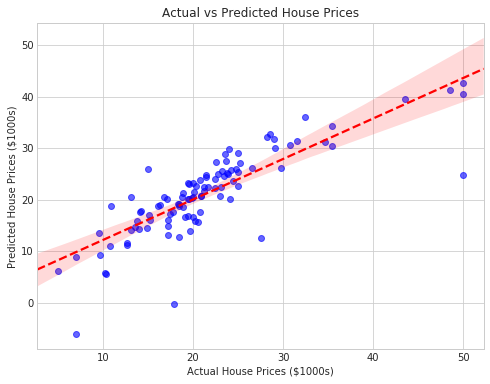

In [21]:
# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red", "linestyle": "--"})
plt.xlabel("Actual House Prices ($1000s)")
plt.ylabel("Predicted House Prices ($1000s)")
plt.title("Actual vs Predicted House Prices")
plt.show()


**Key**

Perfect predictions would lie exactly on the red dashed line.

If points are close to this line, the model is performing well.

Large deviations (far from the red line) indicate where the model is making big mistakes.


**Trying Another Model!  
Random Forest Regression**

 which is often better for complex relationships.


**Random Forest Importance or Features**

Random Forest uses multiple decision trees instead of a single equation.

It captures non-linear relationships better than Linear Regression.

Expect lower MAE, RMSE, and higher R², meaning better accuracy.

In [22]:
from sklearn.ensemble import RandomForestRegressor

#Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Training the model
rf_model.fit(X_train_scaled, y_train)

#3. Making Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

#Evaluating Model Performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📊 Random Forest Model Performance:")
print(f"MAE  (Mean Absolute Error): {mae_rf:.2f}")
print(f"MSE  (Mean Squared Error): {mse_rf:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")



📊 Random Forest Model Performance:
MAE  (Mean Absolute Error): 2.03
MSE  (Mean Squared Error): 7.83
RMSE (Root Mean Squared Error): 2.80
R² Score: 0.8932


**Plot Actual vs. Predicted Prices (Random Forest)**

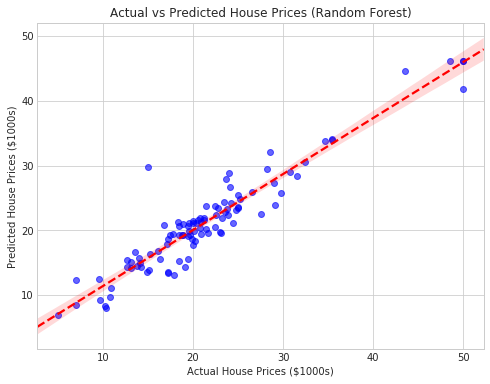

In [23]:
# Scatter plot: Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red", "linestyle": "--"})
plt.xlabel("Actual House Prices ($1000s)")
plt.ylabel("Predicted House Prices ($1000s)")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.show()

# **Thanks for joining me, it's my first Github Project, I mean am uploading on Github.**